## About TBATS

- TBATS is a forecasting method to model time series data.
- The main aim of this is to forecast time series with complex seasonal patterns using exponential smoothing.
- TBATS: Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend and Seasonal components.

In [1]:
import os
import pandas as pd
import numpy as np

In [5]:
filename = 'Daily Bike Sharing.csv'
path = '..\Dataset'
filepath = os.path.join(path,filename)
print(filepath)

..\Dataset\Daily Bike Sharing.csv


In [6]:
#get the data
data = pd.read_csv(filepath, 
                   index_col = "dteday", 
                   parse_dates = True)
data.head(1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [7]:
#select variables
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head(1)  

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [8]:
#renaming variable
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [9]:
#index
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

<AxesSubplot:xlabel='dteday'>

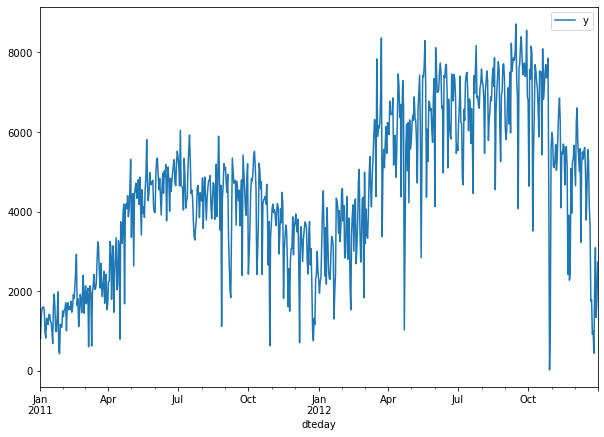

In [10]:
#viz
dataset["y"].plot(figsize = (10, 7), legend = True)

In [11]:
#Training and test set
test_days = 31
training_set = dataset.iloc[:-test_days, :]
test_set = dataset.iloc[-test_days:, :]
test_set.tail(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-31,2729,0,1,2,0.215833,0.223487,0.5775,0.154846


In [12]:
#libraries
from tbats import TBATS

In [13]:
#tbats model
model = TBATS(seasonal_periods = [7, 365.5])   # 7 - days and 365.5 = (365 + 366)/2 , 366 = leap year
model = model.fit(training_set['y'])

In [14]:
#predictions
predictions_tbats = pd.Series(model.forecast(steps = len(test_set))).rename("TBATS")
predictions_tbats.index = test_set.index
predictions_tbats.head()

dteday
2012-12-01    4880.266911
2012-12-02    4484.716439
2012-12-03    4434.522384
2012-12-04    4513.433995
2012-12-05    4650.709377
Freq: D, Name: TBATS, dtype: float64

<AxesSubplot:xlabel='dteday'>

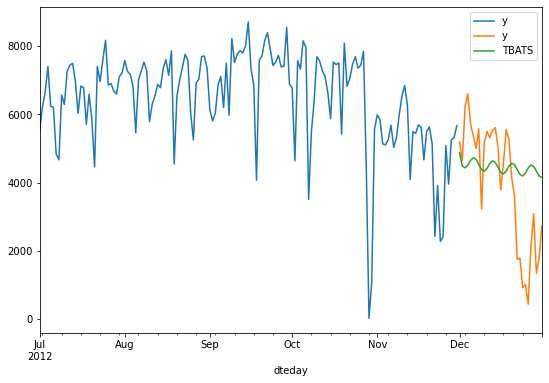

In [15]:
#visualization
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_tbats.plot(legend = True)

In [16]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_tbats),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_tbats)), 0))

1426.0
1748.0


In [17]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_tbats)

90.00295892946434